In [36]:
import numpy as np
import cv2
from utils import imshow
import matplotlib.pyplot as plt

In [52]:
cap = cv2.VideoCapture('../project/output.avi')
ret, frame = cap.read()
cul = np.zeros_like(frame, dtype="uint16")
kernel = np.ones((5,5),np.uint8)
num_of_white = []
fgbg = cv2.createBackgroundSubtractorKNN()
_, max_frame = cap.read()
max_val = 0

while 1:
    ret, frame = cap.read()
    if not ret:
        break
    img = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
#     dilation = img
    ret,thresh1 = cv2.threshold(img,110,255,cv2.THRESH_BINARY)
    dilation = cv2.dilate(thresh1,kernel, iterations=1)
    fgmask = fgbg.apply(dilation)
    thresh1 = cv2.subtract(dilation, fgmask)
    cv2.imshow("t",thresh1)
    if cv2.waitKey(1) & 0xFF == 27:
        break
    cul[thresh1==255] += 1
    s = np.sum(thresh1==255)
    if s > max_val:
        max_val = s
        max_frame = frame
    num_of_white.append(np.sum(thresh1==255))

cap.release()
cv2.destroyAllWindows()

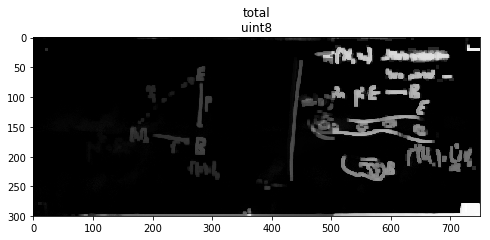

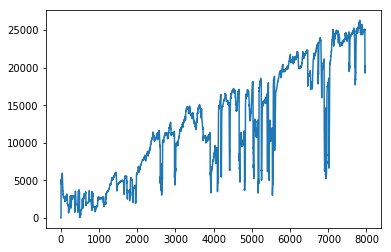

In [51]:
# img = np.zeros_like(cul, dtype="uint8")
# num_of_frames = 7190
img = np.uint8(255.0*cul/np.max(cul))
imshow("total",img, gray=True)
plt.plot(num_of_white)

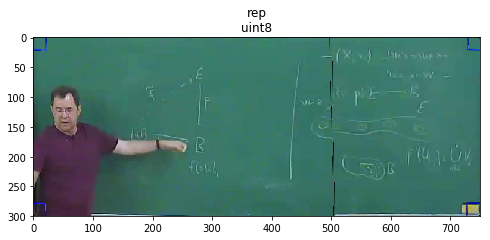

In [53]:
imshow('rep', max_frame)

In [54]:
cv2.imwrite('rep.jpg', max_frame)

True